# Turning Parameters for Machine Learning Models (Part 1: KNN) 

In [1]:
# Import pandas and load data downloaded from https://www.kaggle.com/uciml/pima-indians-diabetes-database#diabetes.csv: 
import pandas as pd
d = pd.read_csv("/home/chidung/Desktop/python_learning/pima/diabetes.csv")

In [2]:
# Inspect our data: 
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Drop Pregnancies and Outcome column: 
d1 = d.drop(["Pregnancies", "Outcome"], axis = 1)

In [4]:

# Convert zeros to NA values: 
import numpy as np
d1 = d1.replace(0, np.nan)

In [5]:
# Replace NA values by mean: 
d1 = d1.fillna(d1.mean())

In [6]:
# Add Pregnancies column: 
df = d1.assign(Pregnancies = d["Pregnancies"])

In [7]:
# Write a function for normalizing 0 - 1 data: 
def normalize_01(data):
    nho_nhat = data.min()
    lon_nhat = data.max(0)
    scaled = (data - nho_nhat) / (lon_nhat - nho_nhat)
    return scaled

In [8]:
# Apply this function for our data: 
df = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
        "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].apply(normalize_01)

In [9]:
# Add Outcome column: 
df = df.assign(Outcome = d["Outcome"])

In [10]:
# Inspect our data again: 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


In [11]:
#====================================================================
#  Search Optimal K by using cross_val_score() function (method 1)
#====================================================================

# Import function for spliting data: 
from sklearn.model_selection import train_test_split

# Split our data: 
train, test = train_test_split(df, 
                               # Use 80% data for training KNN: 
                               test_size = 0.3, 
                               # For reproducing results: 
                               random_state = 0, 
                               stratify = df["Outcome"])

X_train = train[train.columns[0:8]]
y_train = train[train.columns[-1]]

X_test = test[test.columns[0:8]]
y_test = test[test.columns[-1]]

X = df[df.columns[0:8]]
Y = df["Outcome"]

# Set a range of K for evaluating KNN model: 
so_lang_gieng = np.array([1, 3, 5, 7])
cv_scores_test = []
cv_scores_train = []

# Import KNeighborsClassifier() function for using KNN: 
from sklearn.neighbors import KNeighborsClassifier

# Train KNN with 10-fold cross validation and use 20 CPU cores:  
from sklearn.model_selection import cross_val_score
for i in so_lang_gieng:
    knn = KNeighborsClassifier(n_neighbors = i)
    
    # Accuracy for train data: 
    scores1 = cross_val_score(knn, X_train, y_train, cv = 10, scoring = "accuracy", n_jobs = 20)
    cv_scores_train.append(scores1.mean())
    
    # Accuracy for test data: 
    scores2 = cross_val_score(knn, X_test, y_test, cv = 10, scoring = "accuracy", n_jobs = 20)
    cv_scores_test.append(scores2.mean())

Text(0.5,1,'Optimal K based on 10-fold cross validation')

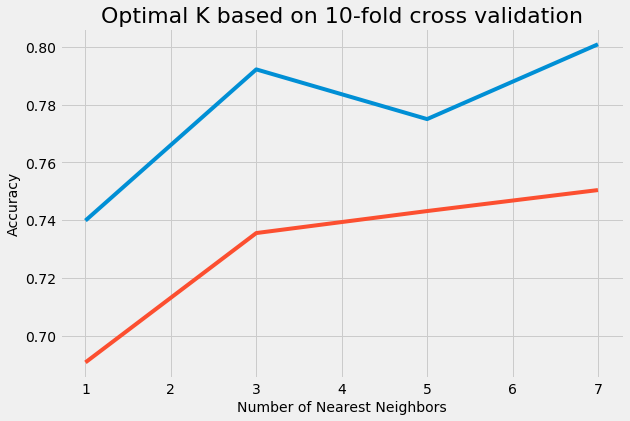

In [12]:
# Visualize our results: 

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize = (9, 6))

plt.plot(so_lang_gieng, cv_scores_test, label = "Accuracy for test")
plt.plot(so_lang_gieng, cv_scores_train, label = "Accuracy for train")
plt.ylabel("Accuracy", fontsize = 14)
plt.xlabel("Number of Nearest Neighbors", fontsize = 14)
plt.title("Optimal K based on 10-fold cross validation", fontsize = 22)

In [13]:
#====================================================================
#  Search Optimal K by using GridSearchCV() function (method 2)
#====================================================================

# Set conditions for grid search: 
param_grid = dict(n_neighbors = so_lang_gieng)

from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")

# Fit the grid with our data: 
grid.fit(X, Y)

# Print results: 
grid.grid_scores_

/home/chidung/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/chidung/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[mean: 0.68490, std: 0.04113, params: {'n_neighbors': 1},
 mean: 0.73307, std: 0.04665, params: {'n_neighbors': 3},
 mean: 0.75260, std: 0.05535, params: {'n_neighbors': 5},
 mean: 0.75391, std: 0.05474, params: {'n_neighbors': 7}]

Text(0.5,1,'Optimal K based on 10-fold cross validation')

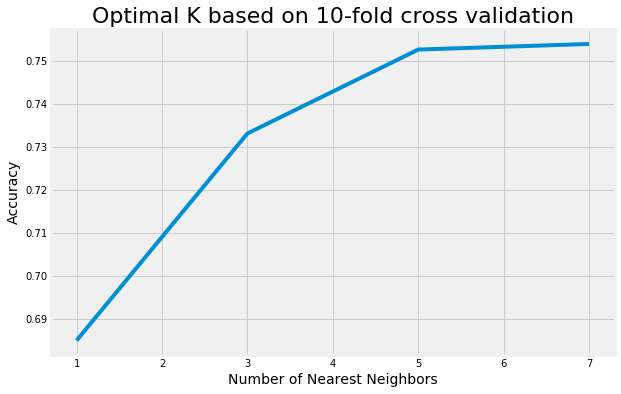

In [14]:
# list comprehension to loop through grid.grid_scores and plot: 
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

plt.figure(figsize = (9, 6))
plt.plot(so_lang_gieng, grid_mean_scores)
plt.ylabel("Accuracy", fontsize = 14)
plt.xlabel("Number of Nearest Neighbors", fontsize = 14)
plt.title("Optimal K based on 10-fold cross validation", fontsize = 22)

In [15]:
# Show the optimal K: 
grid.best_params_

{'n_neighbors': 7}

In [16]:
# Show average accuracy rate (10-fold cross validation): 
grid.best_score_

0.75390625

In [17]:
# Show all information about the best KNN: 
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

### To be continued...